<a href="https://colab.research.google.com/github/hanutm/DigitRecognizer/blob/master/DigitRec_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def generate_centres(X):
  centres = list()
  classes = sorted(list(X.label.unique()))
  for i in classes:
    df_class = X.loc[X.label == i]
    df_class = df_class.iloc[:,1:]
    centres.append(df_class.mean(axis=0))
  return(centres)

In [0]:
def check_digit(img):                     #### Plotting individual pixel information
  img = 255 - np.reshape(img,(28,28))   #### Reshape into a square grid, and invert image
  plt.imshow(img)
  plt.show()

In [0]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [0]:
kNN = generate_centres(df)
predicted = predict_label(df_test)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


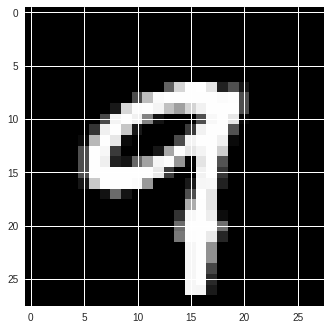

In [134]:
check_digit(df_test.iloc[20])

In [135]:
for i in range(0,10):
  print(i)
  print(np.dot(kNN[i],df_test.iloc[20]))

0
2513932.3482575025
1
1265809.3552519213
2
2144287.094804884
3
2323309.6867386806
4
2680910.9884577603
5
2122211.266403162
6
2145609.0113608893
7
2589484.8220858895
8
2603101.4211174008
9
3087930.058500477
